In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def extract_geometry(filename, step):
    """
    
    """
    
    #The function opens the trajectory file in read mode and reads all the lines into a list called lines. 
    #Then, the file is closed.
    
    f = open(filename, 'r')
    lines = f.readlines()
    f.close()
    
    #The first line of the trajectory file contains the number of atoms, 
    #which is extracted and converted to an integer (natoms).
    
    natoms = int(lines[0])
    
    #The start_line and end_line variables are calculated based on the step number and the number of atoms.
    
    start_line = step*(natoms+2)
    end_line = (step+1)*(natoms+2)
    #print(start_line, end_line)
    
    
    #A new file called Coordinate-{step}.xyz is opened in write mode (step is the step number). 
    #This file will contain the extracted geometry.
    
    f = open(F'Coordinate-{step}.xyz', 'w')
    
    for i in range(start_line, end_line):
        #print(lines[i])
        f.write(lines[i])
    f.write('\n')
    f.close()
    

def submit_job(trajectory_xyz_file, step):
    """
    extract the desired geometry from the trajectory
    """
    
    #This function extract the desired geometry from the trajectory
    extract_geometry(trajectory_xyz_file, step)
    
    f1 = open(F'input_{step}.inp', 'w')
    
    f1.write('! UKS BLYP D3 def2-SVP TightSCF SOMF(1X) \n')
    f1.write('%eprnmr gtensor true ori CenterOfElCharge \n')
    f1.write('end \n')
    f1.write(F'* xyzfile 1 2 Coordinate-{step}.xyz \n')
    
    f1.close()
    
    #The os.system() function is used to execute a command-line instruction. It runs the ORCA program, passing the 
    os.system(F'orca input_{step}.inp > out-{step}.log ')
    

In [21]:
# os.system('module load orca-5-0-3')
# for step in range(1,10):
#     submit_job('../1_md/H2O_trajectory.xyz', step)

In [22]:
def extract_gmatrix(output_file):
    """
    the function reads an output file line by line, searches for the g-matrix section, extracts the g-matrix rows, 
    and returns the g-matrix as a NumPy array.
    """
    
    f = open(output_file,'r')
    lines = f.readlines()
    f.close()
    
    #An empty list called g_matrix is created to store the extracted g-matrix
    g_matrix = []
    
    #A loop is executed over the indices of lines 
    for i in range( len(lines) ):
        #the code extracts the three lines
        if 'The g-matrix:' in lines[i]:
            #print(lines[i], i)
            #print(lines[i+1])
            tmp = lines[i+1].split()
            first_row = [float(tmp[0]), float(tmp[1]), float(tmp[2])] 
            
            tmp = lines[i+2].split()
            second_row = [float(tmp[0]), float(tmp[1]), float(tmp[2])] 
            
            tmp = lines[i+3].split()
            third_row = [float(tmp[0]), float(tmp[1]), float(tmp[2])] 

            #print(first_row)
            #print(second_row)
            #print(third_row)
            #After processing all the lines, the g_matrix list contains the complete g-matrix.
            
            g_matrix.append(first_row)
            g_matrix.append(second_row)
            g_matrix.append(third_row)
            
            
    #list is converted to a NumPy array using the np.array() function, 
    #and the resulting array is stored in the variable g_matrix_nparray       
    g_matrix_nparray = np.array(g_matrix)
    
    return g_matrix_nparray


(29, 3, 3)


Text(0, 0.5, 'G-tensor[0,0]')

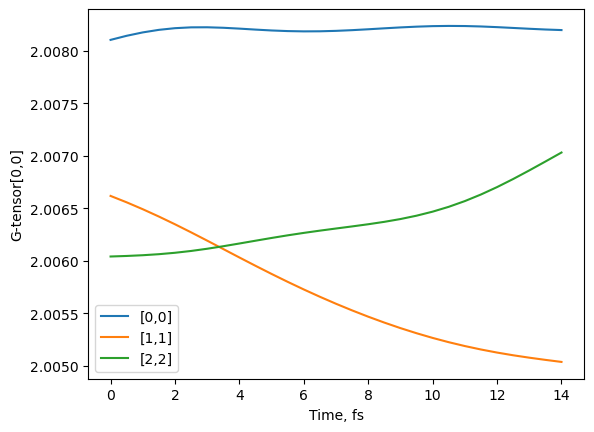

In [24]:
#this code segment extracts g-matrices from log files, 
#stores them in an array, and then plots specific elements of the g-matrix (diagonal elements) against time using Matplotlib. 
#The resulting plot shows the variation of the g-tensor values over time.

plt.figure()
all_g_matrices = []
for i in range(1,30):
    var_1 = extract_gmatrix(F'out-{i}.log')
    #print('G-Matrix for step:', i, '\n', var_1)
    all_g_matrices.append(var_1)

all_g_matrices = np.array(all_g_matrices)
print(all_g_matrices.shape)
#print(all_g_matrices.shape)
#all_g_matrices[0, :, :]
#all_g_matrices[0, :, 0]
md_time = np.arange(0, len(all_g_matrices))*0.5
plt.plot(md_time, all_g_matrices[:,0,0], label='[0,0]')
plt.plot(md_time, all_g_matrices[:,1,1], label='[1,1]')
plt.plot(md_time, all_g_matrices[:,2,2], label='[2,2]')
plt.legend()
plt.xlabel('Time, fs')
plt.ylabel('G-tensor[0,0]')